**Section I: Import the Data**

Imports and Read in File

In [134]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics, preprocessing
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot') 

In [2]:
adult = pd.read_csv("../../assets/datasets/adult.csv")

**Section II: Format the Data**

Convert the data to a Pandas dataframe to work with the data:

In [3]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,small
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,small
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,small


Convert the categorical data to numeric, and prepare a dataframe with these data.

In [106]:
df = adult.copy()
del df["education"]

In [107]:
df["workclass"].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [108]:
def work_dummies(work):
    try:
        if work == "Private":
            return work
        elif "gov" in work:
            return "Government"
        else:
            return "Other"
    except:
        return "Other"

In [109]:
df["work_regrouped"] = df["workclass"].map(work_dummies)

In [110]:
work_dummy_df = pd.get_dummies(df["work_regrouped"], prefix="Work")
del work_dummy_df["Work_Other"]

In [111]:
df = pd.concat([df, work_dummy_df], axis=1)
del df["work_regrouped"]
del df["workclass"]

In [112]:
df["race"].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [113]:
df["Race_white"] = df["race"].map(lambda x: 1 if x == "White" else 0)
del df["race"]

In [114]:
df["Country_US"] = df["native-country"].map(lambda x: 1 if "United-S" in str(x) or "US" in str(x) else 0)
del df["native-country"]

In [115]:
df["Sex_male"] = df["sex"].map(lambda x: 1 if "Male" in str(x) else 0)
del df["sex"]

In [116]:
df["marital-status"].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [117]:
def mari_status(mar):
    try:
        if "Never" in mar:
            return mar
        elif mar in ["Divorced", "Separated", "Widowed", "Married-spouse-absent"]:
            return "Previously-Married"
        else:
            return "Married"
    except:
        return "Other"

In [118]:
df["status_clean"] = df["marital-status"].map(mari_status)

In [119]:
mari_dummies = pd.get_dummies(df["status_clean"], prefix="Status")
del mari_dummies["Status_Previously-Married"]

In [120]:
mari_dummies.head()

,Status_Married,Status_Never-married
0,0,1
1,1,0
2,0,0
3,1,0
4,1,0


In [121]:
df = pd.concat([df,mari_dummies], axis=1)
del df["marital-status"]
del df["status_clean"]

In [122]:
df["occupation"].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [123]:
def occ_bins(occ):
    try:
        if "Exec" in occ or "special" in occ:
            return "Executive"
        elif "Armed" in occ:
            return "Armed_Forces"
        else:
            return "Other"
    except:
        return "Other"

In [124]:
df["Occ"] = df["occupation"].map(occ_bins)
occ_dummies = pd.get_dummies(df["Occ"], prefix="Occ")
del occ_dummies["Occ_Other"]

In [125]:
df = pd.concat([df, occ_dummies], axis=1)
del df["occupation"]
del df["Occ"]

In [126]:
df.relationship.value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [129]:
df.income.value_counts()

small    24720
large     7841
Name: income, dtype: int64

In [130]:
df["big_income"] = df["income"].map(lambda x: 1 if x == "Large" else 0)

In [131]:
df.head()

,age,fnlwgt,education-num,relationship,capital-gain,capital-loss,hours-per-week,income,Work_Government,Work_Private,Race_white,Country_US,Sex_male,Status_Married,Status_Never-married,Occ_Armed_Forces,Occ_Executive,big_income
0,39,77516,13,Not-in-family,2174,0,40,small,1,0,1,1,1,0,1,0,0,0
1,50,83311,13,Husband,0,0,13,small,0,0,1,1,1,1,0,0,1,0
2,38,215646,9,Not-in-family,0,0,40,small,0,1,1,1,1,0,0,0,0,0
3,53,234721,7,Husband,0,0,40,small,0,1,0,1,1,1,0,0,0,0
4,28,338409,13,Wife,0,0,40,small,0,1,0,0,0,1,0,0,1,0


In [132]:
df2 = df.copy()
del df2["relationship"]
del df2["income"]

In [133]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
age                     48842 non-null int64
fnlwgt                  48842 non-null int64
education-num           48842 non-null int64
capital-gain            48842 non-null int64
capital-loss            48842 non-null int64
hours-per-week          48842 non-null int64
Work_Government         48842 non-null uint8
Work_Private            48842 non-null uint8
Race_white              48842 non-null int64
Country_US              48842 non-null int64
Sex_male                48842 non-null int64
Status_Married          48842 non-null uint8
Status_Never-married    48842 non-null uint8
Occ_Armed_Forces        48842 non-null uint8
Occ_Executive           48842 non-null uint8
big_income              48842 non-null int64
dtypes: int64(10), uint8(6)
memory usage: 4.0 MB


### Check for and drop NaNs - our data are messy!

In [ ]:
np.any(np.isnan(...))

Scale your features

In [138]:
cols_to_scale = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
scaler = preprocessing.StandardScaler()
scaled_cols = scaler.fit_transform(df2[cols_to_scale])

In [139]:
df3 = df2.copy()

In [140]:
for i,j in enumerate(cols_to_scale):
    df3[j] = scaled_cols[:, i]

In [141]:
df3.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Work_Government,Work_Private,Race_white,Country_US,Sex_male,Status_Married,Status_Never-married,Occ_Armed_Forces,Occ_Executive,big_income
0,0.025996,-1.061979,1.136512,0.146932,-0.217127,-0.034087,1,0,1,1,1,0,1,0,0,0
1,0.828308,-1.007104,1.136512,-0.144804,-0.217127,-2.213032,0,0,1,1,1,1,0,0,1,0
2,-0.046942,0.246034,-0.419335,-0.144804,-0.217127,-0.034087,0,1,1,1,1,0,0,0,0,0
3,1.047121,0.426663,-1.197259,-0.144804,-0.217127,-0.034087,0,1,0,1,1,1,0,0,0,0
4,-0.776316,1.408530,1.136512,-0.144804,-0.217127,-0.034087,0,1,0,0,0,1,0,0,1,0


**Section III: Examine the Data**

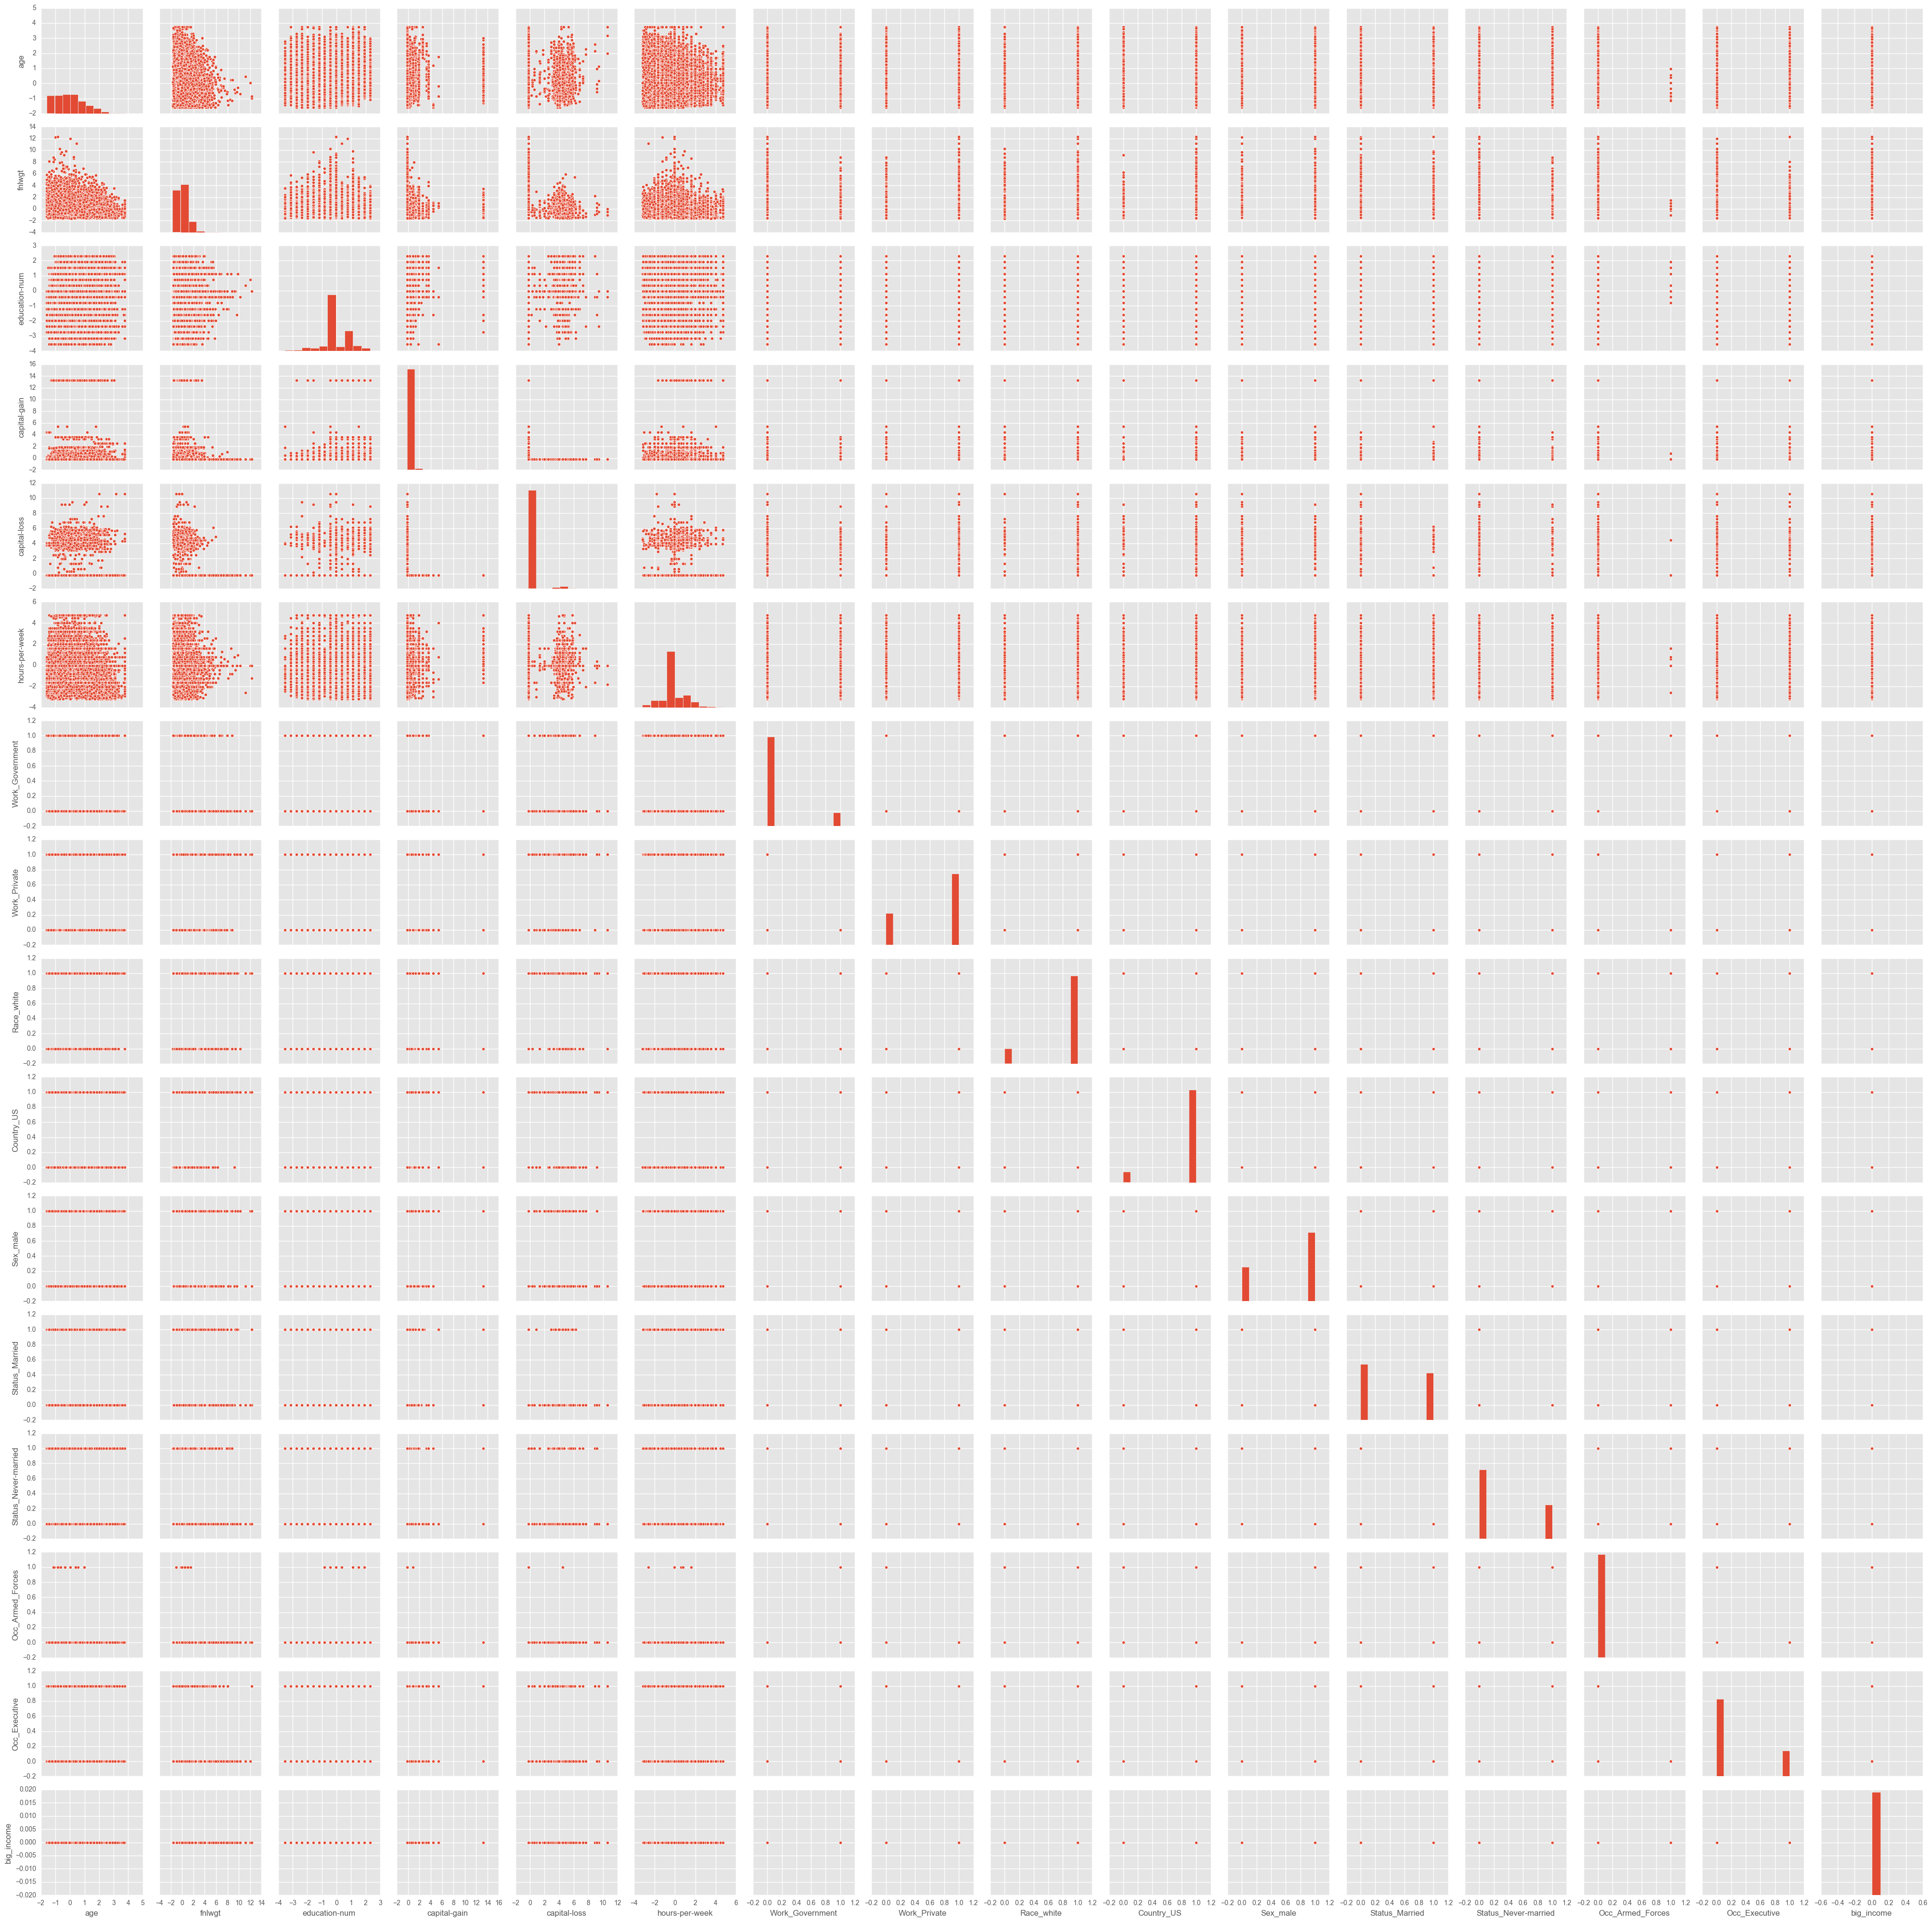

In [143]:
sns.pairplot(df3)

Plot the data to see the distributions within these consumers.

After plotting, decide on how many clusters you want to start with. 

In [145]:
k = 2

**Section IV: Clustering Analysis**

Cluster the data with sklearn.cluster.KMeans

In [147]:
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(df3.iloc[:, :-1])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Get the labels and centroids

In [148]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Compute the silhoutte score and inertia.

In [ ]:
metrics.silhouette_score(df3.iloc[:, :-1], labels)

In [ ]:
inertia = kmeans.in

Add these new cluster labels to your dataframe. Create scatterplots that show your clusters in different colors ('hue') 

### Section V: Interpreting your clusters
Look at your scatterplots. See how each of the clusters breakdown. Come up with descriptions for each of the clusters.

How do these relate to income? How can they inform a targeted marketing campaign?